In [8]:
import pandas as pd
df=pd.read_csv('Rice_data.csv')
# df.columns=['Class']
df
print(df.shape)
print(df.head())

(75000, 107)
   AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  7805    437.915    209.8215     48.0221        0.9735   99.6877    0.9775   
1  7503    340.757    138.3361     69.8417        0.8632   97.7400    0.9660   
2  5124    314.617    141.9803     46.5784        0.9447   80.7718    0.9721   
3  7990    437.085    201.4386     51.2245        0.9671  100.8622    0.9659   
4  7433    342.893    140.3350     68.3927        0.8732   97.2830    0.9831   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  ALLdaub4L  ALLdaub4a  ALLdaub4b  \
0         7985  0.3547        4.3693  ...   113.9924    65.0610    59.5989   
1         7767  0.6637        1.9807  ...   105.7055    64.3685    62.2084   
2         5271  0.4760        3.0482  ...   109.7155    62.6423    58.7439   
3         8272  0.6274        3.9325  ...   116.5405    64.9069    60.2562   
4         7561  0.6006        2.0519  ...   107.7502    64.7071    61.3549   

   ALLdaub4Y  ALLdaub4Cb  ALLdaub4Cr 

# Data Processing

In [9]:
#step 1:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 107 entries, AREA to CLASS
dtypes: float64(95), int64(11), object(1)
memory usage: 61.2+ MB


In [10]:
df.isna().sum()

AREA            0
PERIMETER       0
MAJOR_AXIS      0
MINOR_AXIS      0
ECCENTRICITY    0
               ..
ALLdaub4Cr      0
ALLdaub4XX      0
ALLdaub4YY      0
ALLdaub4ZZ      0
CLASS           0
Length: 107, dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df['CLASS'].value_counts()

Basmati      15000
Arborio      15000
Karacadag    15000
Jasmine      14998
Ipsala       14994
Name: CLASS, dtype: int64

In [13]:
dict={'Arborio':0,'Jasmine':1,'Basmati':2,'Karacadag':3,'Ipsala':4}
df1=df
df1['CLASS']=df1['CLASS'].map(dict)
df1['CLASS'].value_counts

<bound method IndexOpsMixin.value_counts of 0        2
1        0
2        1
3        2
4        0
        ..
74995    0
74996    3
74997    0
74998    4
74999    4
Name: CLASS, Length: 74992, dtype: int64>

In [14]:
x=df1.iloc[0:,:-1] 
print(x)#for some particular columns
y=df1["CLASS"]
print(x.shape)
print(y.shape)
print(y)

        AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0       7805    437.915    209.8215     48.0221        0.9735   99.6877   
1       7503    340.757    138.3361     69.8417        0.8632   97.7400   
2       5124    314.617    141.9803     46.5784        0.9447   80.7718   
3       7990    437.085    201.4386     51.2245        0.9671  100.8622   
4       7433    342.893    140.3350     68.3927        0.8732   97.2830   
...      ...        ...         ...         ...           ...       ...   
74995   5551    285.911    114.1695     62.9079        0.8345   84.0699   
74996   7696    322.703    121.3900     81.1375        0.7438   98.9892   
74997   7579    339.295    136.3125     71.2866        0.8524   98.2338   
74998  15174    489.502    200.9486     97.6282        0.8740  138.9969   
74999  12931    452.635    185.5138     90.2651        0.8736  128.3131   

       SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  ALLdaub4V  ALLdaub4L  \
0        0.9775   

In [15]:
print((y==0).sum())
import numpy as np
print(np.unique(y))

15000
[0 1 2 3 4]


# Testing and Training

In [16]:
#Test train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(74992, 106)
(52494, 106)
(22498, 106)


In [17]:
#model
from sklearn.linear_model import Perceptron
clf=Perceptron()
clf.fit(x_train,y_train)
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training Acc',train_acc)
print('Testing Acc',test_acc)

Training Acc 0.6477121194803216
Testing Acc 0.6471686372121966


In [19]:
print((y_test!=y_test_pred).sum())

7938


In [20]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.44      0.91      0.59      4436
           1       0.65      0.28      0.39      4476
           2       0.67      0.78      0.72      4532
           3       0.99      0.28      0.43      4570
           4       0.93      1.00      0.96      4484

    accuracy                           0.65     22498
   macro avg       0.73      0.65      0.62     22498
weighted avg       0.74      0.65      0.62     22498



In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
print(cm)

[[4024   27   81    0  304]
 [2833 1262  359    1   21]
 [ 380  582 3528   16   26]
 [1931   78 1291 1268    2]
 [   6    0    0    0 4478]]


<AxesSubplot:>

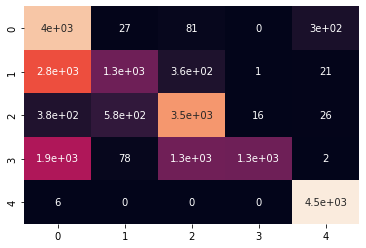

In [22]:
import seaborn as sns
sns.heatmap(cm,annot=True,cbar=False)

In [23]:
#model
from sklearn.linear_model import LogisticRegression
clf=Perceptron()
clf.fit(x_train,y_train)
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training Acc',train_acc)
print('Testing Acc',test_acc)

Training Acc 0.6477121194803216
Testing Acc 0.6471686372121966


In [24]:
#model Logistic
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training Acc',train_acc)
print('Testing Acc',test_acc)

Training Acc 0.77888901588753
Testing Acc 0.7792692683794115


c:\users\abhin\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
#model SVC Support Vector machine
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train,y_train)
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training Acc',train_acc)
print('Testing Acc',test_acc)

Training Acc 0.9099706633139025
Testing Acc 0.9112365543603876


In [26]:
#model SVC Support Vector machine
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(x_train,y_train)
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training Acc',train_acc)
print('Testing Acc',test_acc)

Training Acc 0.9402026898312188
Testing Acc 0.9238598986576585
